# ДЗ-2

# Шуйский Денис, БЭК 213

In [4]:
import numpy as np
import pandas as pd

# Задача №1

## a) постройте график функции правдоподобия как функции от общего кол-ва такси n. Найдите оценку числа n методом максимального правдоподобия

Вероятность того, что девять раз такси не повторялись,
равна: $\frac{n}{n} \cdot \frac{n-1}{n} \cdot \frac{n-2}{n} \cdot \frac{n-3}{n}  \cdot \frac{n-4}{n}  \cdot \frac{n-5}{n}  \cdot \frac{n-36}{n}  \cdot \frac{n-7}{n}  \cdot \frac{n-8}{n} = \frac{(n-1)!}{(n-9)! n^8}$

Вероятность того, что на 10-ый раз приехал таксист, который уже приезжал равна: $\frac{(n-1)!}{(n-9)! n^8} \cdot \frac{9}{n} = \frac{9(n-1)!}{(n-9)! n^9} = F(n)$ - функция правдоподобия 

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def likelihood(k, n):
    prod = 1 # вероятность, что k - 1 без повторения такси
    for i in range(k -1):
        prod *= ((n - i)/n)
    return prod*(k-1)/n # вероятность, что на k будет повтор

def estimation_likelihood(likelihood_arr):
    return np.argmax(likelihood_arr)

In [6]:
k = 10 # повтор такси произошел на 10 заказ
num_taxi_max = 100 # максимальное значение водителей
num_taxi = np.arange(1, num_taxi_max + 1)

likelihood_arr = [likelihood(k, i) for i in num_taxi]
est_likelihood = num_taxi[estimation_likelihood(likelihood_arr)]

print('Оценка методом максимального правдоподобия n = ', est_likelihood)

Оценка методом максимального правдоподобия n =  42


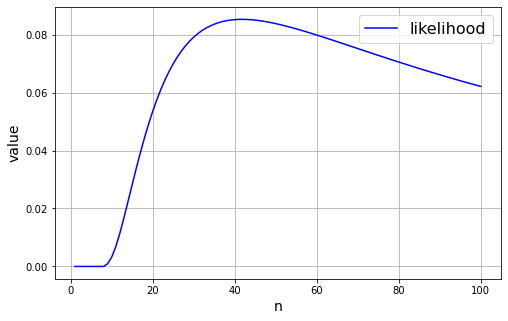

In [7]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(num_taxi, likelihood_arr, color='blue', label='likelihood')
ax.set_xlabel('n', fontsize=14)
ax.set_ylabel('value', fontsize=14)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

Найдем оценку числа n методом максимального правдоподобия **аналитически**:

- $\frac{9n!}{(n-9)!n^{10}} = \frac{9(n-1)!}{((n-1)-9)!(n-1)^{10}} \cdot \frac{n}{n-9} \cdot (\frac{n-1}{n})^{10} = F_{n-1}\cdot(1-\frac{1}{n})^{10}:(1-\frac{9}{n})$

- то есть нужно найти когда коэффициент$(1-\frac{1}{n})^{10}:(1-\frac{9}{n}) >= 1$ 

- замена: $ \frac{1}{n} = x$
- $(1-x)^{10} >= 1-9x$ 
- $x^{10} - 10 x^9 + 45 x^8 - 120 x^7 + 210 x^6 - 252 x^5 + 210 x^4 - 120 x^3 + 45 x^2 - 10 x + 1 >= 1-9x$
- $x^{9} - 10 x^8 + 45 x^7 - 120 x^6 + 210 x^5 - 252 x^4 + 210 x^3 - 120 x^2 + 45 x - 1  >= 0$ (поделили на x)

Оставим члены со степенью <= 1, так как остальные малы по сравнению с ними:

- $- 120 x^2 + 45 x - 1  >= 0$ 
- $ 120 x^2 - 45 x +1  <= 0$ 
- $\frac{1}{240}(45-\sqrt{1545})<= x <= \frac{1}{240}(45+\sqrt{1545})$
- $0.023722966608053783 <=𝑥<= 0.35127703339194627$ 
- $2.8467559929664534 <=n<= 42.15324400703354$ 

Пока n  <= 42.15324400703354, множитель возрастает, а дальше начинает убывать.

**Cледовательно  n = 42, численная и аналитическая оценки совпадают!**

## б) постройте график математического ожидания номера заказа, на котором происходит первый повторный приезд, как функции от общего количества такси n. Найдите оценку числа n методом моментов

In [8]:
def expected_value(n):
    expect_value = 0
    for k in range(2, n + 2):
        prod = 1
        for j in range(k - 1):
            prod *= (n - j)/n
        expect_value += k*(k - 1) * prod/n
    return expect_value

# оценка методом момента
def estimation_mm(expectations_per_n, k_gt):
    return np.argmin(np.abs(np.asarray(expectations_per_n) - k_gt))

In [9]:
max_num_taxi = 100 # максимальное кол-во такси в городе
num_taxi = np.arange(1, max_num_taxi + 1)

expectations_per_n = []
for n in num_taxi:
    expectations_per_n.append(expected_value(n))

k_gt = 10 # на каком шаге произошел повтор
estimate_moments = num_taxi[estimation_mm(expectations_per_n, k_gt)]

print('Оценка методом моментов n = ', estimate_moments)

Оценка методом моментов n =  55


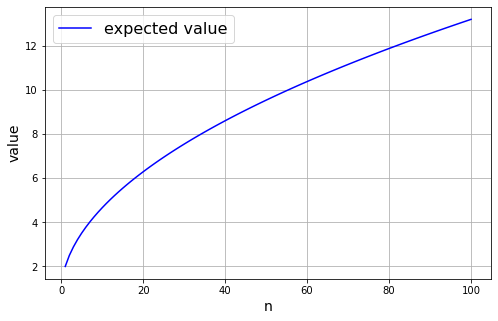

In [10]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(num_taxi, expectations_per_n, color='blue', label='expected value')
ax.set_xlabel('n', fontsize=14)
ax.set_ylabel('value', fontsize=14)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

## в) Предположим, что настоящее n равно 100. Проведя 1000 симуляций вызовов такси до первого повторного, рассчитайте 10000 оценок методом маоментов и 10000 оценок методом максимального правдоподобия. Постройте гистограммы для оценок двух методов. Оцените смещение, дисперсию и среднеквадратичную ошибку двух методов.

Метод моментов
Смещение:  10.505200000000002
Дисперсия:  6680.52357296
СКО:  81.73855694914862
Метод макс. правдоподобия
Смещение:  -9.7984
Дисперсия:  5498.77355744
СКО:  74.15742369978194


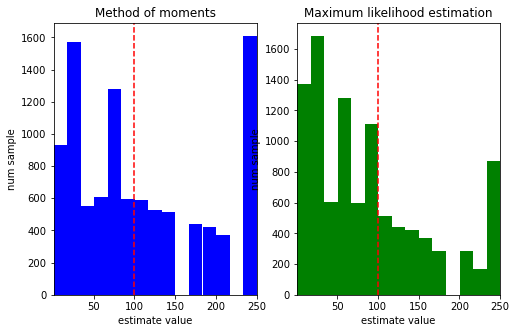

In [11]:
num_simulations = 10**4 # кол-во симутяций
n_gt = 100 # истинное кол-во водителей
np.random.seed(1) # фиксируем сид, для воспроизводимости результатов

k_s = np.empty((num_simulations), dtype = np.int32)
estimations_mm = np.empty((num_simulations), dtype = np.int32)
estimations_likehood = np.empty((num_simulations), dtype = np.int32)

for i in range(num_simulations):
    taxi_sequence = np.random.randint(1, n_gt + 1, size=n_gt + 2) # генерируем последовательность такси 
    
    # находим первый повтор
    for j in range(1, n_gt + 2):
        value, count = np.unique(taxi_sequence[:j], return_counts = True)
        if np.sum(count == 2) > 0:
            k_ = len(value) + 1 # номер первого повтора
            break
    k_s[i] = k_

# предвычисляем мат. ожидание
expectations_per_n = []
num_taxi = np.arange(1, 250 + 1)
for n in num_taxi:
    expectations_per_n.append(expected_value(n))

# два цикла и доп. массив не очень, но для отработки удобнее
for i in range(num_simulations):
    estimations_mm[i] = num_taxi[estimation_mm(expectations_per_n, k_s[i])]
    likelihood_arr = [likelihood(k_s[i], j) for j in num_taxi]
    estimations_likehood[i] = num_taxi[estimation_likelihood(likelihood_arr)]


fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 5))

ax1.hist(estimations_mm, bins = int(np.ceil(np.log2(num_simulations) + 1)), color = 'blue')
ax1.axvline(x = n_gt, color = 'red', linestyle = '--')
ax1.set_xlim((1, 250))
ax1.set_xlabel('estimate value')
ax1.set_ylabel('num sample')
ax1.set_title('Method of moments')

ax2.hist(estimations_likehood, bins = int(np.ceil(np.log2(num_simulations) + 1)), color = 'green')
ax2.axvline(x = n_gt, color = 'red', linestyle = '--')
ax2.set_xlim((1, 250))
ax2.set_xlabel('estimate value')
ax2.set_ylabel('num sample')
ax2.set_title('Maximum likelihood estimation')

print('Метод моментов')
print('Смещение: ', np.mean(estimations_mm) - n_gt)
print('Дисперсия: ', np.var(estimations_mm))
print('СКО: ', np.std(estimations_mm, ddof=1))

print('Метод макс. правдоподобия')
print('Смещение: ', np.mean(estimations_likehood) - n_gt)
print('Дисперсия: ', np.var(estimations_likehood))
print('СКО: ', np.std(estimations_likehood, ddof=1))


plt.show()

# Задача №3

Математическое ожидание экспоненциального распределения ($\lambda e^{-\lambda x}, x >=0$) с интенсивностью $\lambda = 1$ = 1.

Математическое ожидание распределения Cтьюдента(3) = 0 

In [12]:
from scipy.stats import expon, norm, t
n = 20
samples_expon = expon.rvs(scale = 1,  size = (10000,n))
samples_student = t.rvs(df = 3,  size = (10000,n))

true_m_exp = 1
true_m_st = 0

**Классический асимптотический нормальный интервал:**

Воспользуемся ЦПТ:

$\sqrt(N) \cdot \frac{M - \bar{X}}{S} -> N(0,1)$,

где M - мат. ожидание генеральной совокупности;

S = - подправленное выборочное среднеквадратичное отклонение

Тогда $M \in (\bar{X} \pm \frac{x_{\gamma} \cdot S}{\sqrt{N}}), x_{\gamma} = z_{(\gamma+1)/2}$ - квантиль нормального распределения уровня $(\gamma+1)/2$

In [13]:
np.random.seed(1)
def assymp_ci(samples, n):
    s = np.sqrt(np.var(samples, axis = 1)*n/(n-1))
    left_interval_assymp = np.mean(samples, axis=1)-s*norm.ppf(0.975)* 1/(np.sqrt(n))
    right_interval_assymp = np.mean(samples, axis=1)+s*norm.ppf(0.975)* 1/(np.sqrt(n))
    return left_interval_assymp, right_interval_assymp

In [14]:
# Экспоненциальное распределение
left_interval_assymp_exp, right_interval_assymp_exp = assymp_ci(samples_expon, n)

# Распределение Стьюдента
left_interval_assymp_st, right_interval_assymp_st = assymp_ci(samples_student, n)

**Наивный бутстрэп:**

In [15]:
N_bootstrap = 10000
np.random.seed(1)
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def get_q(arr):
    sample_mean = np.mean(arr, axis = 1)
    q_l,q_r = np.quantile(sample_mean,[0.025, 0.975]) 
    return q_l,q_r

In [16]:
np.random.seed(1)
def naive_bootstrap(N_bootstrap, samples):
    q_arr_bootstrap = np.zeros((N_bootstrap, 2))
    for i in range(samples.shape[0]):
        bootstrap_samples = get_bootstrap_samples(samples[i],N_bootstrap)
        q_l, q_r = get_q(bootstrap_samples)
        q_arr_bootstrap[i,0], q_arr_bootstrap[i,1] =  q_l, q_r
    return q_arr_bootstrap

q_arr_bootstrap_exp = naive_bootstrap(N_bootstrap, samples_expon)
q_arr_bootstrap_st = naive_bootstrap(N_bootstrap, samples_student)

**Бутстрэп t-статистика:**

In [17]:
np.random.seed(1)
mean_init_sample_expon = np.mean(samples_expon, axis=1)
mean_init_sample_st = np.mean(samples_student, axis=1)

In [18]:
np.random.seed(1)
def get_t_stat(arr, n, mmean):
    sample_mean = np.mean(arr, axis = 1)
    sample_se = np.sqrt(np.sum((arr - sample_mean[..., np.newaxis])**2)/(n-1)/n)
    sample_t  = (sample_mean[..., np.newaxis] - mmean)/sample_se
    return sample_t, sample_se


def t_bootstrap(N_bootstrap,samples,mean_init_sample):
    ci = np.zeros((N_bootstrap, 2))
    for i in range(samples.shape[0]):
        bootstrap_samples = get_bootstrap_samples(samples[i],N_bootstrap)
        t, se = get_t_stat(bootstrap_samples, n, mean_init_sample[i])
        t_l, t_r = np.quantile(t,[0.025, 0.975]) 
        ci_l, ci_r = mean_init_sample[i]- t_r*se, mean_init_sample[i]- t_l*se
        ci[i,0], ci[i,1] =  ci_l, ci_r
    return ci

ci_exp = t_bootstrap(N_bootstrap, samples_expon,mean_init_sample_expon)
ci_st = t_bootstrap(N_bootstrap, samples_student,mean_init_sample_st)

In [19]:
np.random.seed(1)
assymp_expon = np.vstack((left_interval_assymp_exp,right_interval_assymp_exp)).T
assymp_st = np.vstack((left_interval_assymp_st,right_interval_assymp_st)).T

In [20]:
np.random.seed(1)
cover_percent_expon_assymp = np.where((true_m_exp>=assymp_expon[:,0])&(true_m_exp<=assymp_expon[:,1]))[0].shape[0]/10000*100
cover_percent_expon_bootstrap = np.where((true_m_exp>=q_arr_bootstrap_exp[:,0])&(true_m_exp<=q_arr_bootstrap_exp[:,1]))[0].shape[0]/10000*100
cover_percent_expon_t_bootstrap = np.where((true_m_exp>=ci_exp[:,0])&(true_m_exp<=ci_exp[:,1]))[0].shape[0]/10000*100


cover_percent_st_assymp = np.where((true_m_st>=assymp_st[:,0])&(true_m_st<=assymp_st[:,1]))[0].shape[0]/10000*100
cover_percent_st_bootstrap = np.where((true_m_st>=q_arr_bootstrap_st[:,0])&(true_m_st<=q_arr_bootstrap_st[:,1]))[0].shape[0]/10000*100
cover_percent_st_t_bootstrap = np.where((true_m_st>=ci_st[:,0])&(true_m_st<=ci_st[:,1]))[0].shape[0]/10000*100


print('Классический асимптотический нормальный интервал, экспоненциальное распределение:{0}'.format(cover_percent_expon_assymp))
print('Наивный бутстрэп, экспоненциальное распределение:{0}'.format(cover_percent_expon_bootstrap))
print('Бутстрэп t-статистика, экспоненциальное распределение:{0}\n\n'.format(cover_percent_expon_t_bootstrap))


print('Классический асимптотический нормальный интервал, распределение Стьюдента:{0} '.format(cover_percent_st_assymp))
print('Наивный бутстрэп, распределение Стьюдента:{0}'.format(cover_percent_st_bootstrap))
print('Бутстрэп t-статистика, распределение Стьюдента:{0} \n\n'.format(cover_percent_st_t_bootstrap))


Классический асимптотический нормальный интервал, экспоненциальное распределение:90.52
Наивный бутстрэп, экспоненциальное распределение:90.58
Бутстрэп t-статистика, экспоненциальное распределение:88.83


Классический асимптотический нормальный интервал, распределение Стьюдента:94.19999999999999 
Наивный бутстрэп, распределение Стьюдента:91.97
Бутстрэп t-статистика, распределение Стьюдента:94.36 




В первом случае лучше себя показал классический асимптотический нормальный интервал, но в случае с распределением Стьюдента уже лучшим оказывается бустрэп t-статистики

# Задача №4

$H_0:$ Оценка(Г) = Оценка(С)

$H_1:$ Оценка(Г) <> Оценка(С)

$\alpha = 0.05$ 

In [21]:
import pandas as pd
from scipy import stats
from IPython.display import display, Markdown

# Cчитаем данные и разобъем на две группы
vse_gls = ["а", "е", "ё", "и", "о", "у", "ы", "э", "ю", "я"]

data = pd.read_csv('dz.csv', sep = ';')

marks = {'gls': [],\
         'sogls': []}

for i in range(len(data)):
    last_name = data['Surname'].iloc[i].lower()
    if last_name[0] in vse_gls:
        marks['gls'].append(data['Mark'].iloc[i])
    else:
        marks['sogls'].append(data['Mark'].iloc[i])

**Тест Уэлча**

In [22]:
print(stats.ttest_ind(marks['sogls'], marks['gls'], equal_var = False ))

Ttest_indResult(statistic=0.8519661870595602, pvalue=0.39740271538438376)


In [23]:
display(Markdown(
   rf"""
$p-value > \alpha->H_{0}$ не отврегаем
"""))


$p-value > \alpha->H_0$ не отврегаем


**Наивный бустрэп**

In [24]:
pip install bstrap

In [25]:
from bstrap import bootstrap, boostrapping_CI
np.random.seed(1)
metric = np.mean
stats_method1, stats_method2, p_value = bootstrap(metric, pd.Series(marks['sogls']),\
                                                  pd.Series(marks['gls']), nbr_runs=1000)
print(stats_method1)
print(stats_method2)
print(p_value)

{'avg_metric': 16.368081272084805, 'metric_ci_lb': 15.61113074204947, 'metric_ci_ub': 17.102826855123677}
{'avg_metric': 15.213775510204082, 'metric_ci_lb': 13.36734693877551, 'metric_ci_ub': 17.1234693877551}
0.345


In [26]:
display(Markdown(
   rf"""
$p-value > \alpha->H_{0}$ не отврегаем
"""))


$p-value > \alpha->H_0$ не отврегаем


**Бустрэп t-статистики**

In [27]:
nn = 1000
# Cреднее/СO**2 исходных выборок
mean_sogl = np.mean(marks['sogls'])
mean_gls = np.mean(marks['gls'])

sigma_sogl_2 = np.sum((np.array(marks['sogls']) - mean_sogl)**2)/len(marks['sogls'])
sigma_gls_2 = np.sum((np.array(marks['gls']) - mean_gls)**2)/len(marks['gls'])

# Генерируем бутстрэп выборки
bootstrap_sogl = np.random.choice(marks['sogls'], (nn,len(marks['sogls']) ))
bootstrap_gls = np.random.choice(marks['gls'], (nn,len(marks['gls']) ))

# Среднее/CO**2 бутстрэп выборок
mean_sogl_bs = np.mean(bootstrap_sogl, axis=1)
mean_gls_bs = np.mean(bootstrap_gls, axis=1)

sigma_sogl_bs_2 = np.sum((bootstrap_sogl - mean_sogl_bs[..., np.newaxis])**2, axis=1)/len(marks['sogls'])
sigma_gls_bs_2 = np.sum((bootstrap_gls - mean_gls_bs[..., np.newaxis])**2, axis=1)/len(marks['gls'])

# Cчитаем t статистику
t_bs =  ( (mean_sogl_bs - mean_gls_bs) - (mean_sogl-mean_gls) )/np.sqrt(sigma_sogl_bs_2/len(marks['sogls']) + sigma_gls_bs_2/len(marks['gls']))

In [28]:
t_bs_l, t_bs_r = np.quantile(t_bs,  [0.025, 0.975])
ci_bs_l= (mean_sogl-mean_gls)-t_bs_r*np.sqrt(sigma_sogl_2/len(marks['sogls'])+ sigma_gls_2/len(marks['gls']))
ci_bs_r = (mean_sogl-mean_gls)-t_bs_l*np.sqrt(sigma_sogl_2/len(marks['sogls'])+ sigma_gls_2/len(marks['gls']))

In [29]:
if (0 > ci_bs_l) and (0<ci_bs_r):
    print('H0 гипотеза о равенстве средних не отвергается')
else:
    print('H0 гипотеза о равенстве средних  отвергается')

H0 гипотеза о равенстве средних не отвергается


**Перестановочный тест**

In [30]:
pip install --upgrade scipy

In [31]:
from scipy import stats

In [32]:
def statistic(x, y):
    return np.mean(x) - np.mean(y)

res = stats.permutation_test((marks['sogls'], marks['gls']), statistic)
print(res)

PermutationTestResult(statistic=1.0782433114588574, pvalue=0.3982, null_distribution=array([-0.07095983, -1.84264801,  0.0248071 , ..., -0.50191101,
        0.26422442,  2.41898031]))


In [33]:
display(Markdown(
   rf"""
$p-value > \alpha->H_{0}$ не отврегаем
"""))


$p-value > \alpha->H_0$ не отврегаем


# Задача 6

In [44]:
df = pd.read_csv('dz.csv', sep = ';')

In [45]:
df.Surname = df.Surname.apply(len)

In [46]:
beta = df['Mark'].mean() / df['Surname'].mean()
print(beta)

2.0613026819923372


In [47]:
correlation = df['Mark'].corr(df['Surname'])
print(correlation)

0.025328052669147665


In [49]:
permuted_corr_list = []
np.random.seed(1)
for _ in range(10000):
    permuted_df = df.copy()
    permuted_df['Surname'] = np.random.permutation(permuted_df['Surname'])
    permuted_corr = permuted_df['Mark'].corr(permuted_df['Surname'])
    permuted_corr_list.append(permuted_corr)
p_value = (np.abs(permuted_corr_list) >= np.abs(correlation)).mean()
print(p_value)

0.6503


In [50]:
print('H0 не отвергаем')

H0 не отвергаем


# Задача 7

Я решил пообщаться с ChatGPT и предложить ему решить задачку №19 из минимума КР-4

Самое задание : Вася Сидоров утверждает, что ходит в кино в два раза чаще, чем в спортзал, а в спортзал в два раза чаще,
чем в театр. За последние полгода он 10 раз был в театре, 17 раз – в спортзале и 39 раз в кино. На уровне
значимости 5% проверьте утверждение Васи. 

Ожидаемое решение от ChatGPT : γobs ≈ 0.26, γcrit = 5.99, нет оснований отвергать H0.

ссылка на диалог: https://chat.openai.com/share/c2ee584c-f6d0-41c7-b733-31fd39fb7bea

Оказалось, что ChatGPT не очень имеет какие-то проблемы с арифметическими действиями...

# Задача 8

Не знаю, был ли упомянут этот источник на вики курса, но мне очень помог канал на ютубе https://www.youtube.com/@user-bm5zk9mf3o/videos

Я по роликам из него помню делал какой-то номер из ДЗ-1, также использовал канал при подготовке к экзамену/кр в первом семестре, ну и периодически смотрел видосы для того, чтобы лучше понять материал по матстату/курсу по анализу данных 